# Regressão linear

#### Prevendo o número de passageiros de uma linha de ônibus

In [316]:
import pandas as pd
from sklearn.model_selection import train_test_split as split
# from sklearn.linear_model import LinearRegression as lr
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [317]:
database = pd.read_csv('./dados/Passageiros.csv')

In [318]:
database.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [319]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tempo         144 non-null    float64
 1   nPassageiros  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


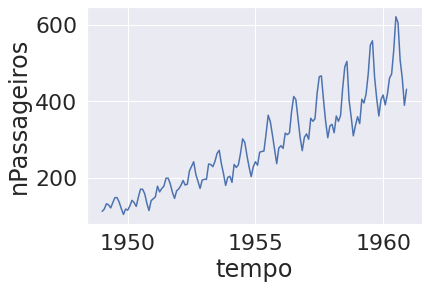

In [320]:
sns.lineplot(x='tempo', y='nPassageiros', data=database)

### Formas de transformar colunas para ML em array

In [321]:
tempo = database.iloc[:,:-1].values

In [322]:
nPassageiros = database.iloc[:,1].values

### Separando os dados de Treino e Teste

In [323]:
Tempo_train, Tempo_test, Passageiros_train, Passageiros_test = split(tempo, nPassageiros, test_size = 0.3)  # train_size = 0.7 test_size = 0.3 ou seja 70 a 30.

In [324]:
lr = linear_model.LinearRegression()

#### Fit nas bases Traino

In [325]:
lr.fit(Tempo_train, Passageiros_train)

LinearRegression()

#### Predict nas bases de Testes

In [326]:
result = lr.predict(Tempo_test)

In [327]:
Passag_predict = pd.DataFrame({'Tempo' : np.ndarray.flatten(Tempo_test)
                                ,'nPassageiros': result})

Passag_teste = pd.DataFrame({'Tempo' : np.ndarray.flatten(Tempo_test)
                               ,'nPassageiros': Passageiros_test})

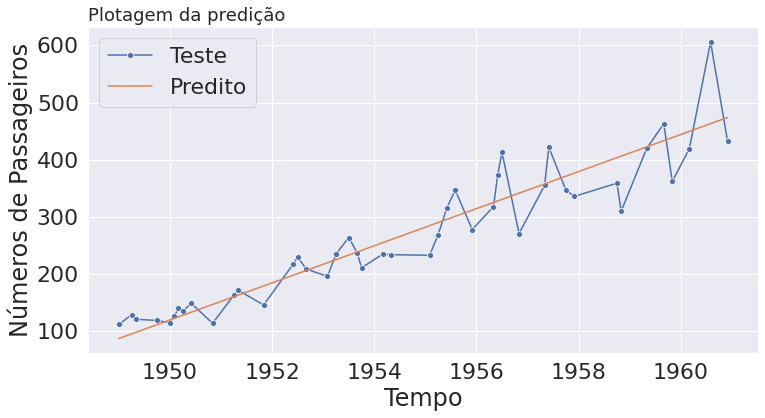

In [328]:
plt.figure(figsize = (12,6))
sns.set(font_scale=2)
ax = sns.lineplot(x='Tempo', y='nPassageiros', data=Passag_teste, marker='o', label = "Teste")
ax = sns.lineplot(x='Tempo', y='nPassageiros', data = Passag_predict, label = "Predito" )
ax.set_ylabel("Números de Passageiros")
ax.set_title('Plotagem da predição', loc='left', fontsize=18)
ax = ax

### Medindo a qualidade da regressão

In [329]:
lr.coef_

array([32.43052707])

In [330]:
lr.intercept_

-63119.623105941224

In [331]:
r2_score(Passag_teste,Passag_predict)  # Nossa reta está explicando razoável bem apesar da sazonalidade! quase 100%

0.9337851081566411

In [332]:
#### Usado SVM/SVR = para regressão // Suport vector Machine para melhorar o modelo

In [333]:
lr_svr = SVR(C=10000)

In [334]:
lr_svr.fit(Tempo_train, Passageiros_train)

SVR(C=10000)

In [335]:
Passag_predict_svr = lr_svr.predict(Tempo_test)

In [336]:
Passageiros_predict_svr = pd.DataFrame({'Tempo' : np.ndarray.flatten(Tempo_test)
                                ,'nPassageiros': Passag_predict_svr})

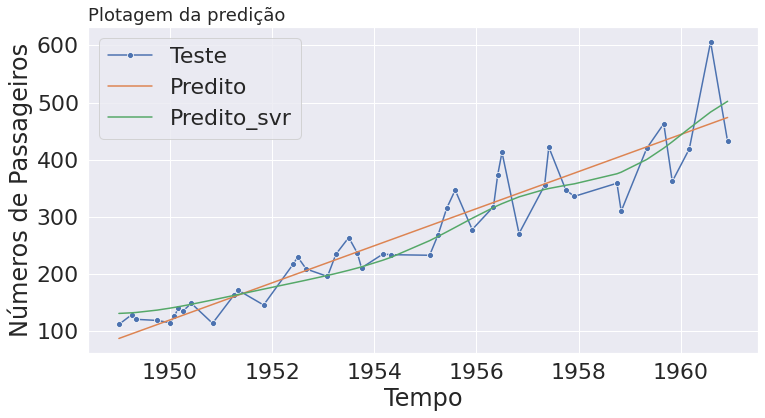

In [337]:
plt.figure(figsize = (12,6))
sns.set(font_scale=2)
ax = sns.lineplot(x='Tempo', y='nPassageiros', data=Passag_teste, marker='o', label = "Teste")
ax = sns.lineplot(x='Tempo', y='nPassageiros', data = Passag_predict, label = "Predito" )
ax = sns.lineplot(x='Tempo', y='nPassageiros', data = Passageiros_predict_svr, label = "Predito_svr" )
ax.set_ylabel("Números de Passageiros")
ax.set_title('Plotagem da predição', loc='left', fontsize=18)
ax = ax

In [339]:
r2_score(Passag_teste,Passageiros_predict)

NameError: name 'Passageiros_predict' is not defined

In [338]:
r2_score(Passag_teste,Passageiros_predict_svr)

0.9369951382156152